In [6]:
import pandas as pd
T7 = pd.read_csv("T7_within_base model.csv")
T7_tuned = pd.read_csv("T7_within_tuned model.csv")

In [7]:
T7

,base model,valid_AUC,valid_AUC_PR,valid_Recall,valid_F1,test_AUC,test_AUC_PR,test_Recall,test_F1
0,CI,0.735001,0.219120,0.217088,0.240430,0.791637,0.262226,0.255197,0.294934
1,DS,0.759805,0.794054,0.776656,0.712681,0.678368,0.714242,0.543333,0.534302


In [8]:
T7_tuned

,tuned model,valid_AUC_tuned,valid_AUC_PR_tuned,valid_Recall_tuned,valid_F1_tuned,test_AUC_tuned,test_AUC_PR_tuned,test_Recall_tuned,test_F1_tuned
0,CI,0.739098,0.215805,0.234568,0.253224,0.805827,0.272781,0.271735,0.312382
1,DS,0.761925,0.796248,0.778055,0.712700,0.701806,0.731528,0.626667,0.661286


0.7390975144642857 0
0.2158054699285714 0
0.2345679020714285 0
0.2532235463928572 0
0.7619250083333333 1
0.7962478220000001 1
0.7780551136666668 1
0.7126999413333334 1


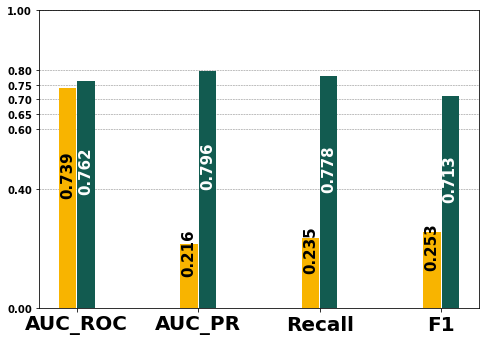

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=15) 
plt.rc('font', weight = 'bold')

def main():
	#### 1. bar plot으로 나타낼 데이터 입력
	models = ['Class imbalanced (CI) tuned','Data Scarcity (DS) tuned']
	xticks = ['AUC_ROC', 'AUC_PR', 'Recall', 'F1']
	data = {
			'Class imbalanced (CI) tuned': T7_tuned.iloc[0,1:5],
            'Data Scarcity (DS) tuned' :  T7_tuned.iloc[1,1:5]
           }
	
	#### 2. matplotlib의 figure 및 axis 설정
	fig, ax = plt.subplots(1,1,figsize=(7,5)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
	colors = ['#F8B400', '#125B50']
	width = 0.15
	
	#### 3. bar 그리기
	for i, model in enumerate(models):
		pos = compute_pos(xticks, width, i, models)
		bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
		present_height(ax, bar, i )#bar높이 출력
	
	#### 4. x축 세부설정
	ax.set_xticks(range(len(xticks)))
	ax.set_xticklabels(xticks, fontsize=20)	
	# ax.set_xlabel('Cancer type', fontsize=14)
	
	#### 5. y축 세부설정
	ax.set_ylim([0.5,0.76])
	ax.set_yticks([0.0, 0.40, 0.60, 0.65, 0.7,0.75, 0.8,1.0])
	ax.yaxis.set_tick_params(labelsize=10)
	# ax.set_ylabel('Prediction Accuracy', fontsize=14)
	
	#### 6. 범례 나타내기
	#ax.legend(loc='upper right', shadow=True, ncol=1, fontsize=13)
	
	#### 7. 보조선(눈금선) 나타내기
	ax.set_axisbelow(True)
	ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
	
	#### 8. 그래프 저장하고 출력하기
	plt.tight_layout()
	plt.savefig('T5_validation.png', format='png', dpi=300)
	plt.show()
	
def compute_pos(xticks, width, i, models) :
  index = np.arange(len(xticks))
  n = len(models)
  correction = i-0.5*(n-1)
  return index + width*correction

def present_height(ax, bar, i):
	for rect in bar:
		height = rect.get_height()
		print(height, i)
		posx = rect.get_x()+rect.get_width()*0.5
		posy = height*0.5
		if i % 2 == 1 : 
			ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom', color='white')
		else : 
			ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom')        

if __name__=='__main__':
	main()

0.8058272843214287 0
0.2727811019285714 0
0.2717350077142856 0
0.3123818819999999 0
0.7018055556666667 1
0.7315282253333333 1
0.6266666666666666 1
0.6612859833333333 1


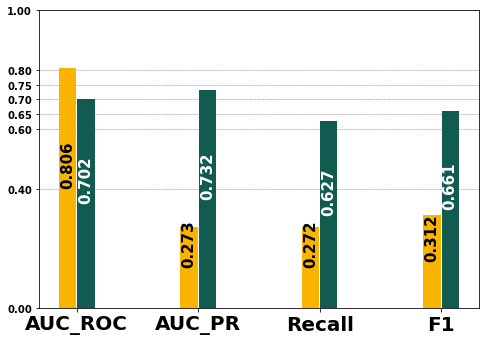

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', size=15) 
plt.rc('font', weight = 'bold')

def main():
	#### 1. bar plot으로 나타낼 데이터 입력
	models = ['Class imbalanced (CI) tuned', 'Data Scarcity (DS) tuned']
	xticks = ['AUC_ROC','AUC_PR', 'Recall', 'F1']
	data = {
			'Class imbalanced (CI) tuned':T7_tuned.iloc[0,5:], 
            'Data Scarcity (DS) tuned' : T7_tuned.iloc[1,5:]
           }
	
	#### 2. matplotlib의 figure 및 axis 설정
	fig, ax = plt.subplots(1,1,figsize=(7,5)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
	colors = ['#F8B400', '#125B50']
	width = 0.15
	
	#### 3. bar 그리기
	for i, model in enumerate(models):
		pos = compute_pos(xticks, width, i, models)
		bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
		present_height(ax, bar,i) # bar높이 출력
	
	#### 4. x축 세부설정
	ax.set_xticks(range(len(xticks)))
	ax.set_xticklabels(xticks, fontsize=20)	
	# ax.set_xlabel('Cancer type', fontsize=14)
	
	#### 5. y축 세부설정
	ax.set_ylim([0.5,0.76])
	ax.set_yticks([0.0, 0.40, 0.60, 0.65, 0.7,0.75, 0.8,1.0])
	ax.yaxis.set_tick_params(labelsize=10)
	# ax.set_ylabel('Prediction Accuracy', fontsize=14)
	
	#### 6. 범례 나타내기
	#ax.legend(loc='upper right', shadow=True, ncol=1, fontsize=13)
	
	#### 7. 보조선(눈금선) 나타내기
	ax.set_axisbelow(True)
	ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
	
	#### 8. 그래프 저장하고 출력하기
	plt.tight_layout()
	plt.savefig('T5_test.png', format='png', dpi=300)
	plt.show()
	
def compute_pos(xticks, width, i, models) :
  index = np.arange(len(xticks))
  n = len(models)
  correction = i-0.5*(n-1)
  return index + width*correction

def present_height(ax, bar, i):
	for rect in bar:
		height = rect.get_height()
		print(height, i)
		posx = rect.get_x()+rect.get_width()*0.5
		posy = height*0.5
		if i % 2 == 1 : 
			ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom', color='white')
		else : 
			ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom')    
		
if __name__=='__main__':
	main()